In [2]:
from statsmodels.tsa import seasonal,arima_model
import statsmodels.api as st
import pandas as pd
import numpy as np

data = pd.read_csv('/content/AirPassengers.csv')

print(data.shape)
data.head()



(144, 2)


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
# convert the month column from text to datatime

data['Month'] = pd.to_datetime(data['Month'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [5]:
data.head(50)

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
5,1949-06-01,135
6,1949-07-01,148
7,1949-08-01,148
8,1949-09-01,136
9,1949-10-01,119


In [6]:
# set the month column as the index of the pandas dataframe

data.set_index('Month',inplace=True)

data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

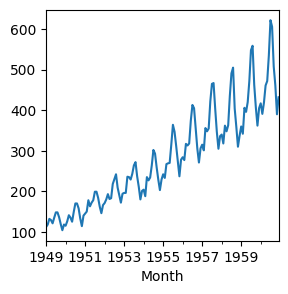

In [7]:
import matplotlib.pyplot as plt
# visualise the data
data['#Passengers'].plot(figsize=(3,3))

Text(0.5, 1.0, 'Residual')

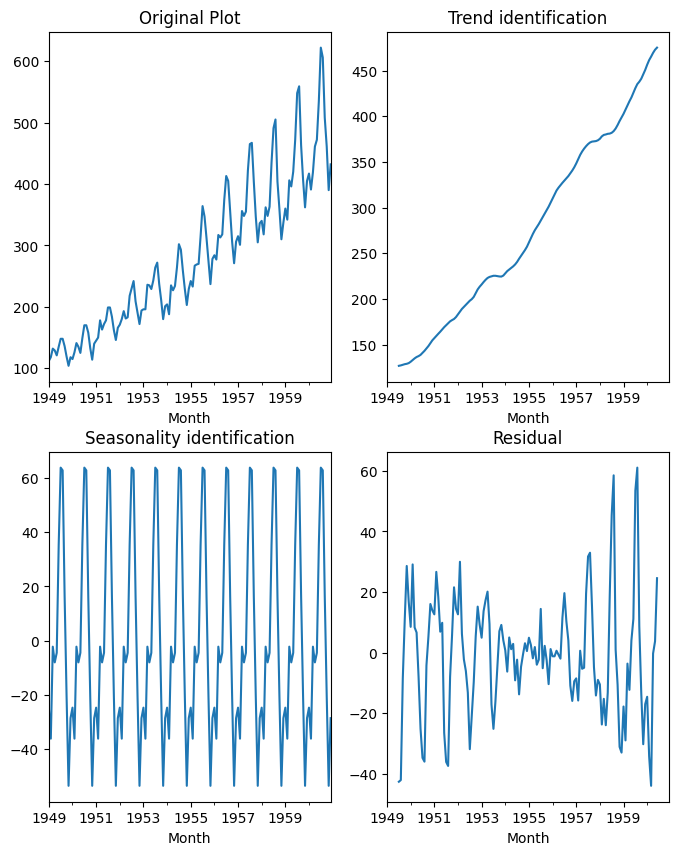

In [8]:
tempData = data['#Passengers']
OrigData = tempData.copy()

var = seasonal.seasonal_decompose(tempData)
plt.figure(1,(8,10))
plt.subplot(2,2,1)
var.observed.plot()
plt.title('Original Plot')
plt.subplot(2,2,2)
var.trend.plot()
plt.title('Trend identification')

plt.subplot(2,2,3)
var.seasonal.plot()
plt.title('Seasonality identification')

plt.subplot(2,2,4)
var.resid.plot()
plt.title('Residual')


In [9]:
# lets create the forecaster

sarima_model = st.tsa.statespace.SARIMAX(tempData,order=(1,1,1),seasonal_order=(1,1,1,12))
# train the model
sarima_model = sarima_model.fit()

# forecaste the value
value_for= sarima_model.forecast()
print(value_for)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


1961-01-01    449.330152
Freq: MS, dtype: float64


In [10]:
tempData.tail()

Month
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, dtype: int64

In [11]:
# i want to forecast the one year data

num_samples = 12

for i in range(num_samples):
  sarima_model = st.tsa.statespace.SARIMAX(tempData,order=(1,1,1),seasonal_order=(1,1,1,12))
  # train the model
  sarima_model = sarima_model.fit()
  # forecast the value
  value_for= sarima_model.forecast()
  tempData


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

In [12]:
tempData = pd.concat([tempData, value_for])
tempData.tail()

1960-09-01    508.000000
1960-10-01    461.000000
1960-11-01    390.000000
1960-12-01    432.000000
1961-01-01    449.330152
dtype: float64

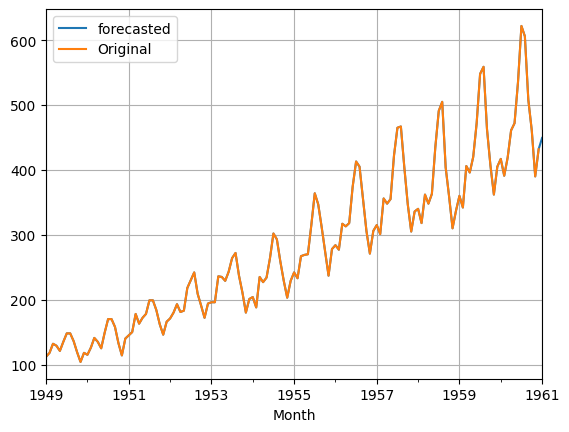

In [13]:
plt.figure(1)
tempData.plot(label='forecasted')
OrigData.plot(label='Original')
plt.legend()
plt.grid('on')

In [14]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.8 MB/s eta 0:00:00


In [15]:
from pmdarima import auto_arima

auto_arima(tempData,seasonal=True,m=12,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1026.738, Time=1.06 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1038.552, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1027.259, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1027.783, Time=0.16 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1026.760, Time=0.58 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1026.349, Time=0.63 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1026.159, Time=0.23 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1031.042, Time=0.15 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1024.647, Time=0.25 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1024.672, Time=0.49 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1025.133, Time=0.48 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=1024.918, Time=1.08 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1029.315, Time=0.10 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1029.324, Time=0.08 sec
 ARIMA(3,1,1)(0,1,0

ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency informati

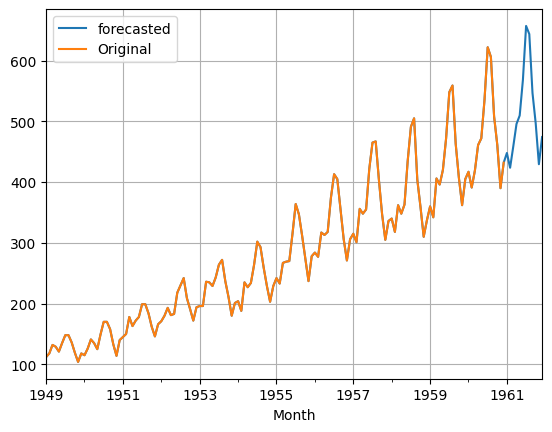

In [16]:
# i want to forecast the one year data
tempData = data['#Passengers']
num_samples = 12

for i in range(num_samples):
  sarima_model = st.tsa.statespace.SARIMAX(tempData,order=(2,1,1),seasonal_order=(2,1,0,12))
  # train the model
  sarima_model = sarima_model.fit()
  # forecast the value
  value_for= sarima_model.forecast()
  tempData = pd.concat([tempData, value_for])

plt.figure(1)
tempData.plot(label='forecasted')
OrigData.plot(label='Original')
plt.legend()
plt.grid('on')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency informati

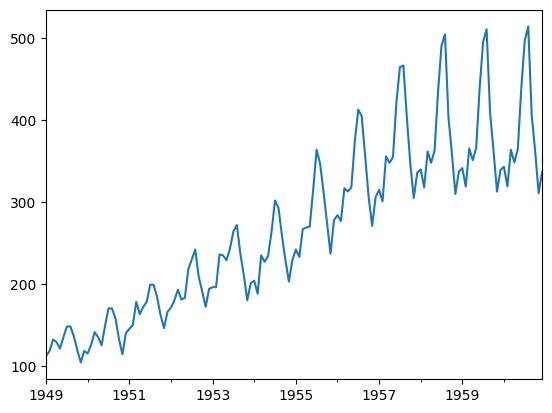

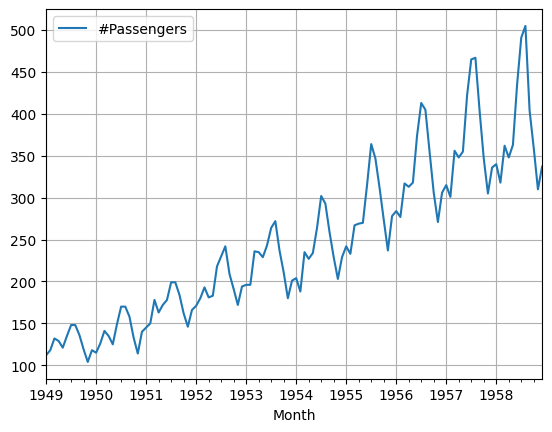

In [17]:
newData = data.iloc[:-24] # -24 means from the end 24 samples deducted
newData.tail()
# i want to forecast the one year data
tempData = newData['#Passengers']
num_samples = 24

for i in range(num_samples):
  sarima_model = st.tsa.statespace.SARIMAX(tempData,order=(2,1,1),seasonal_order=(2,1,0,12))
  # train the model
  sarima_model = sarima_model.fit()
  # forecast the value
  value_for= sarima_model.forecast()
  tempData = pd.concat([tempData, value_for])

plt.figure(1)
tempData.plot(label='forecasted')
newData.plot(label='Original')
plt.legend()
plt.grid('on')

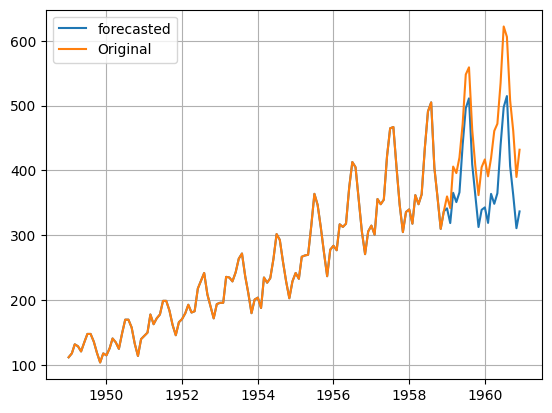

In [18]:
plt.figure(1)
plt.plot(tempData,label='forecasted')
plt.plot(data,label='Original')
plt.legend()
plt.grid('on')